In [1]:
import pandas as pd
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import math
from tqdm import tqdm
from time import time
import Filter
import ProjectPackage.DataExtraction as de
import ProjectPackage.Kinematic as km
from ProjectPackage import Cut

In [4]:
import MC_data

In [3]:
from collections import Counter

In [2]:
data_folder = 'D:/Data_muons/dimuonData_LHC18mMC'
run_number = 290350

In [5]:
all_hist_MC = MC_data.M_inv_hist_MC(data_folder, run_number)

Size of the data file : 6.83 Mo.
Extraction took 0.3 s.
Number of events : 40000.
Size of the data file : 6.83 Mo.
Extraction took 3.3 s.
Number of events : 40000.

Cut nMuons [...] 
 
This cut rejects 73.47 % of the statistics

Cut CMUL [...] 
 
This cut rejects 19.57 % of the statistics

Cut zVtx [...] 
 
This cut rejects 3.43 % of the statistics

Cut threshold [...] 
This cut rejects 30.13 % of the statistics

Cut eta [...] 
This cut rejects 8.62 % of the statistics

Cut pDCA [...] 
 
This cut rejects 4.7 % of the statistics
Max number of possible muons pairs : 3264


100%|██████████| 3264/3264 [00:02<00:00, 1143.97it/s]


Execution time : 3.14
This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 621
This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 1038
This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 812
This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 406
This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 214
This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 105
This cut rejects 0.0 % of the statistics.

Number of di-muons pairs : 53


In [8]:
de.save_dict_hist(f'Save/MC_{run_number}_histograms', all_hist_MC)

FileNotFoundError: [Errno 2] No such file or directory: 'Save/MC_290350_histograms'

In [5]:
numbers = MC_data.MC_analysis(data_folder, run_number)

Size of the data file : 6.83 Mo.
Extraction took 1.3 s.
Number of events : 40000.
Size of the data file : 6.83 Mo.
Extraction took 1.2 s.
Number of events : 40000.


100%|██████████| 26456/26456 [00:09<00:00, 2936.74it/s]


Execution time : 11.84


100%|██████████| 22202/22202 [00:20<00:00, 1078.64it/s]


Execution time : 22.56
This cut rejects 1.14 % of the statistics.

Number of di-muons pairs : 961
This cut rejects 0.57 % of the statistics.

Number of di-muons pairs : 1769
This cut rejects 0.62 % of the statistics.

Number of di-muons pairs : 1610
This cut rejects 0.5 % of the statistics.

Number of di-muons pairs : 1010
This cut rejects 0.62 % of the statistics.

Number of di-muons pairs : 641
This cut rejects 0.25 % of the statistics.

Number of di-muons pairs : 401
This cut rejects 0.51 % of the statistics.

Number of di-muons pairs : 396


In [6]:
numbers

{(0, 1): (3935, 950),
 (1, 2): (7340, 1759),
 (2, 3): (6355, 1600),
 (3, 4): (3817, 1005),
 (4, 5): (2173, 637),
 (5, 6): (1186, 400),
 (6, 8): (1075, 394)}

In [10]:
pd.DataFrame(numbers.values(), columns=['N_gen', 'N_rec']).to_csv(f'Save/MC_{run_number}_genrec.csv')

Let's compare how the filters affect the JPsi

In [14]:
gen_events = de.read_root_file(data_folder, run_number, branch='genTree')
events = de.read_root_file(data_folder, run_number)

df_events = ak.to_pandas(events['Muon'])

Size of the data file : 6.83 Mo.
Extraction took 1.3 s.
Number of events : 40000.
Size of the data file : 6.83 Mo.
Extraction took 1.0 s.
Number of events : 40000.


In [15]:
df_JPsi = de.MC_muons_from_JPsi(gen_events, df_events)

In [18]:
N_JPsi_generated =  Counter(gen_events['Muon']['GenMotherPDGCode'][:, 0])[443]
print(f'Number of JPsi generated : {N_JPsi_generated}')

Number of JPsi generated : 26456


In [16]:
df_JPsi= Cut.more_than_one_muon(df_JPsi)

In [21]:
df_JPsi

E        Px        Py         Pz  Charge  thetaAbs  \
entry subentry                                                               
4     0         32.639103  0.898272 -2.246393 -32.549145      -1  4.356109   
      1         12.560914  1.282863  0.857640 -12.465317       1  7.241020   
8     0         44.965744 -4.125182  1.447606 -44.752590      -1  5.587151   
      1          8.473455  0.162316 -0.625763  -8.448098       1  4.269989   
15    0         17.779661  0.511636 -1.937725 -17.666031      -1  6.330056   
...                   ...       ...       ...        ...     ...       ...   
39988 1         20.137711 -0.383547 -0.664144 -20.122824      -1  2.173791   
39989 0         29.315990  0.276409  1.644271 -29.268347       1  3.361345   
      1         14.165579 -1.182077 -1.001817 -14.080182      -1  6.416943   
39997 0          9.412484 -0.564705  0.943806  -9.347408      -1  6.987274   
      1         21.762341  0.950925 -1.703994 -21.674419       1  5.081514   

                     xDCA       yDCA       zDCA  matchedTrgThreshold  \
entry subentry                                                         
4     0         -0.438410   3.873013  10.617554                    2   
      1         -3.917211   2.590415  10.617554                    2   
8     0          2.080722  -0.382406  -2.787759                    3   
      1         -4.809096  -6.479955  -2.787759                    0   
15    0          3.012422   0.058989  -7.586966                    2   
...                   ...        ...        ...                  ...   
39988 1         -0.507162   7.567567  -1.243141                    2   
39989 0         -0.832773  -0.049870   8.092486                    3   
      1          3.565193   4.464727   8.092486                    2   
39997 0         19.466990 -11.121731   0.967598                    2   
      1          2.113030  -1.407254   0.967598                    2   

                MCHClusterMap  MTRHitMapTrg  MTRHitMapTrk  MCLabel  MCPDGCode  \
entry subentry                                                                  
4     0                  1023    1074414591        672767        2         13   
      1                   511    3224669183       3443711        1        -13   
8     0                   991    1080415487       6661119        2         13   
      1                  1023    1073741824         23552        1        -13   
15    0                  1023    1074353271        606071        2         13   
...                       ...           ...           ...      ...        ...   
39988 1                  1021    1077751807       4009983        2         13   
39989 0                   927    3221621759        396287        1        -13   
      1                  1023    1080177663       6435839        2         13   
39997 0                   991    1080435711       6693887        2         13   
      1                  1023    3221968127        739327        1        -13   

                GenMotherPDGCode  
entry subentry                    
4     0                      443  
      1                      443  
8     0                      443  
      1                      443  
15    0                      443  
...                          ...  
39988 1                      443  
39989 0                      443  
      1                      443  
39997 0                      443  
      1                      443  

[14040 rows x 16 columns]

In [17]:
df_MC_di_muons = de.di_muons_dataframe(df_JPsi)

100%|██████████| 7020/7020 [00:08<00:00, 862.93it/s] 


Execution time : 9.72


In [18]:
df_MC_di_muons['M_inv'] = df_MC_di_muons.apply(lambda x: km.inv_mass(x['E1'], x['E2'], x['P1'], x['P2']), axis=1)

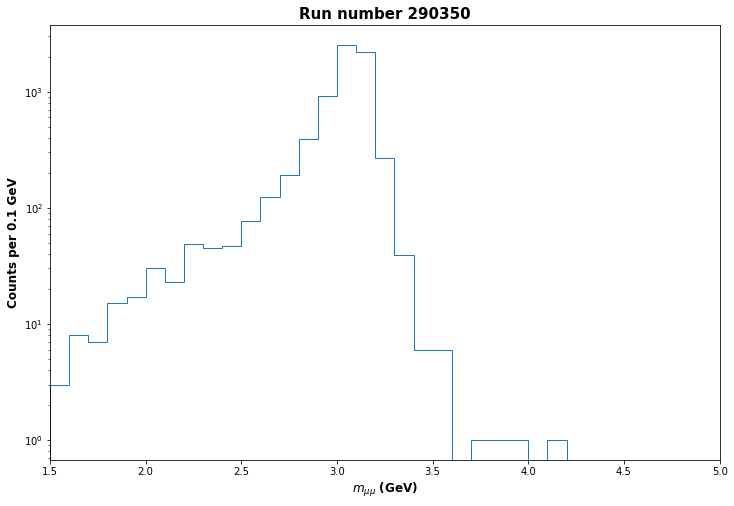

In [19]:
h = Filter.plot_M_inv(df_MC_di_muons['M_inv'], run_number)

In [20]:
events_filtered, idx = Filter.cut_events(events, MC=True)


Cut nMuons [...] 
 
This cut rejects 73.47 % of the statistics

Cut CMUL [...] 
 
This cut rejects 19.57 % of the statistics

Cut zVtx [...] 
 
This cut rejects 3.43 % of the statistics


In [22]:
df_ev_filtered = ak.to_pandas(events_filtered['Muon'])
df_ev_filtered.index = df_ev_filtered.index.set_levels(idx, level=0)

In [23]:
df_JPsi = de.MC_muons_from_JPsi(gen_events, df_ev_filtered)  # all muons from a JPsi event
df_JPsi = Cut.more_than_one_muon(df_JPsi)

In [24]:
df_JPsi_filtered = Filter.cut_tracks(df_JPsi)
df_MC_di_muons_filtered = de.di_muons_dataframe(df_JPsi_filtered)


Cut threshold [...] 
This cut rejects 30.13 % of the statistics

Cut eta [...] 
This cut rejects 8.62 % of the statistics

Cut pDCA [...] 
 
This cut rejects 4.7 % of the statistics
Max number of possible muons pairs : 3264


100%|██████████| 3264/3264 [00:02<00:00, 1143.53it/s]

Execution time : 3.88


In [25]:
df_MC_di_muons_filtered['M_inv'] = df_MC_di_muons_filtered.apply(lambda x: km.inv_mass(x['E1'], x['E2'], x['P1'], x['P2']), axis=1)

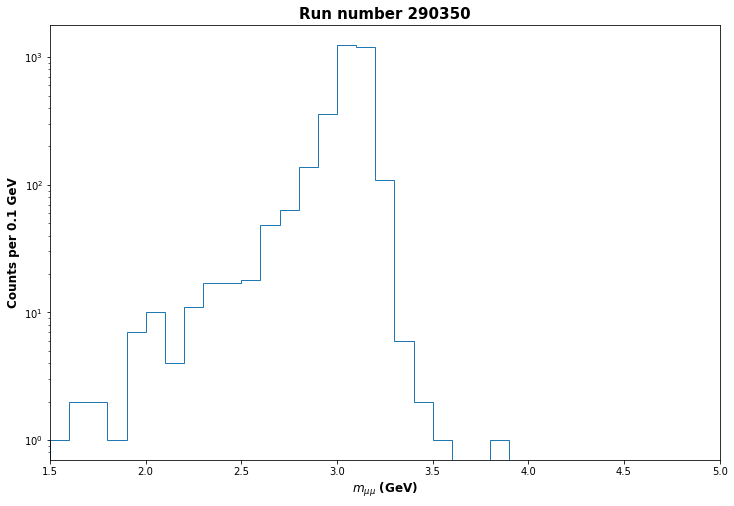

In [28]:
h = Filter.plot_M_inv(df_MC_di_muons_filtered['M_inv'], run_number)

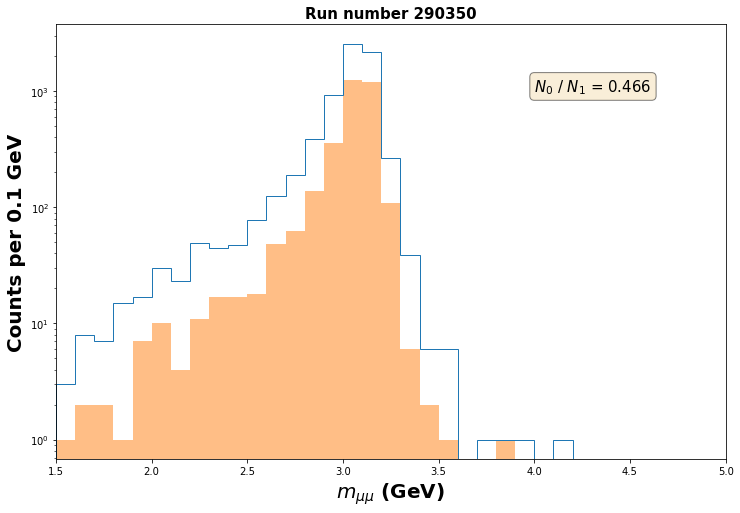

In [ ]:
bins = np.linspace(1.5, 5, 36)  # width = 0.1 GeV

plt.figure(figsize=(12, 8))
plt.xlim(1.5, 5)
plt.semilogy()
h1 = plt.hist(df_MC_di_muons['M_inv'], bins=bins, range=[1.5, 5], histtype='step', align='mid')
plt.xlabel(r"$m_{\mu\mu}$ (GeV)", fontweight='bold', fontsize=20)
h2 = plt.hist(df_MC_di_muons_filtered['M_inv'], bins=bins, range=[1.5, 5], alpha=0.5, align='mid')

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(4,1e3, f'$N_0$ / $N_1$ = {round(h2[0].sum()/h1[0].sum(), 3)}', fontsize=15, bbox=props)

plt.title(f'Run number {run_number}', fontsize=15, fontweight='bold')
plt.ylabel('Counts per 0.1 GeV', fontsize=20, fontweight='bold')

plt.savefig('Figures/Filter_comparison.pdf')

In [30]:
h1[0].sum()

6990.0

In [31]:
h2[0].sum()

3256.0

In [32]:
h2[0].sum() / h1[0].sum()

0.4658082975679542

In [35]:
S = 0
for v in numbers.values():
    S+= v[1]
S

6745